# "BITCOIN" Price Prediction Using XGBClassifier

### About this file
BTC-2021min.csv contains all the 1 Minute historical data of 2021, this dataset contains columns including Unix Timestamp, dates, Symbol, opening, high, low, closing, Volume (Crypto) and Volume Base Ccy. code up your first kernel: LSTMs and Deep Reinforcement Learning agents works well for this dataset. Don't forget to up-vote 👍 **Currency in BTC-USD

### About each Column:

Unix Timestamp - This is the unix timestamp or also known as "Epoch Time". Use this to convert to your local timezone
Date - This timestamp is UTC Timezone
Symbol - The symbol for which the timeseries data refers
Open - This is the opening price of the time period
High - This is the highest price of the time period
Low - This is the lowest price of the time period
Close - This is the closing price of the time period
Volume (Crypto) - This is the volume in the transacted Ccy. Ie. For BTC/USDT, this is in BTC amount
Volume Base Ccy - This is the volume in the base/converted ccy. Ie. For BTC/USDT, this is in USDT amount 

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load The Bitcoin 2021 Dataset 

In [2]:
data = pd.read_csv("BTC-2021min.csv")

In [3]:
data.head()

,unix,date,time,open,high,low,close,Volume BTC,Volume USD
0,1646106180,01-03-2022,03:43:00,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,01-03-2022,03:41:00,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,01-03-2022,03:40:00,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,01-03-2022,03:39:00,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390270
4,1646105880,01-03-2022,03:38:00,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   time        610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


In [5]:
data.drop('unix',axis=1,inplace=True)

In [6]:
data.head()

,date,time,open,high,low,close,Volume BTC,Volume USD
0,01-03-2022,03:43:00,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,01-03-2022,03:41:00,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,01-03-2022,03:40:00,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,01-03-2022,03:39:00,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390270
4,01-03-2022,03:38:00,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [7]:
data.shape

(610782, 8)

In [8]:
data.describe()

,open,high,low,close,Volume BTC,Volume USD
count,610782.000000,610782.000000,610782.000000,610782.000000,610782.000000,6.107820e+05
mean,46482.265381,46509.783597,46454.085712,46482.567211,3.165254,1.389474e+05
std,9453.990285,9454.798088,9453.135638,9454.107853,7.893321,3.298068e+05
min,28093.810000,28397.520000,27734.000000,28073.030000,0.000000,0.000000e+00
25%,38129.052500,38157.882500,38099.437500,38129.137500,0.193192,8.859586e+03
50%,46666.960000,46697.745000,46636.710000,46667.295000,0.924971,4.190121e+04
75%,54907.797500,54938.655000,54877.405000,54907.412500,2.989888,1.349341e+05
max,69000.000000,69000.000000,68799.990000,69000.000000,398.565948,1.396792e+07


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        610782 non-null  object 
 1   time        610782 non-null  object 
 2   open        610782 non-null  float64
 3   high        610782 non-null  float64
 4   low         610782 non-null  float64
 5   close       610782 non-null  float64
 6   Volume BTC  610782 non-null  float64
 7   Volume USD  610782 non-null  float64
dtypes: float64(6), object(2)
memory usage: 37.3+ MB


# Exploratory Data Analysis 

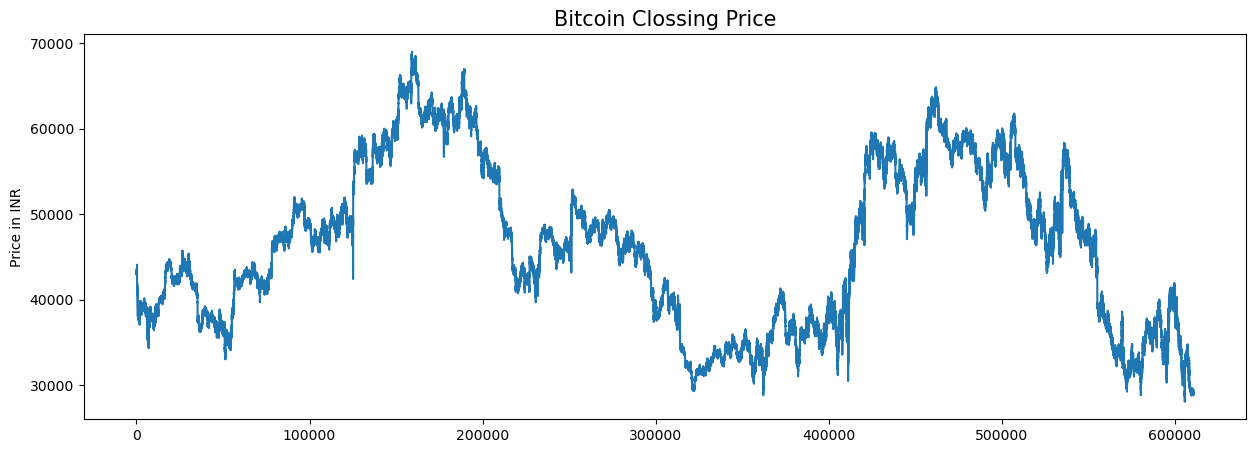

In [10]:
plt.figure(figsize=(15,5))
plt.plot(data['close'])
plt.title('Bitcoin Clossing Price',fontsize=15)
plt.ylabel('Price in INR')
plt.show()

### The prices of the Bitcoin stocks are showing an upward trend as depicted by the plot of the closing price of the stocks. 

In [11]:
data.isnull().sum()

date          0
time          0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

C:\Users\91914\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91914\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91914\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

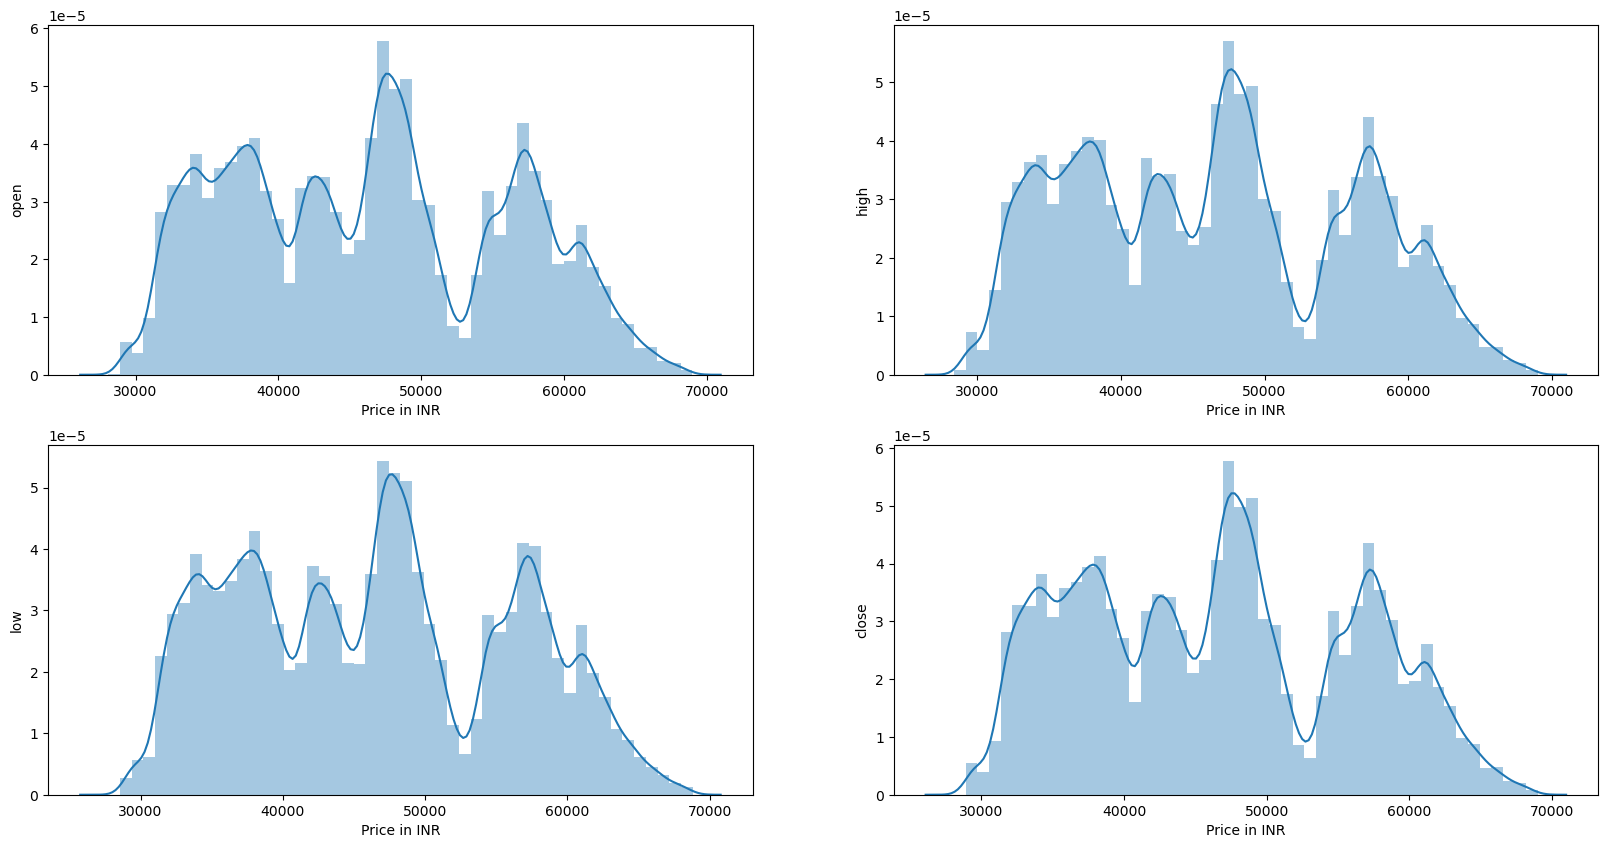

In [12]:
features = ['open','high','low','close']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.distplot(data[col])
    plt.ylabel(col)
    plt.xlabel('Price in INR')
plt.show()

C:\Users\91914\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91914\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91914\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91914\anaconda3\lib\si

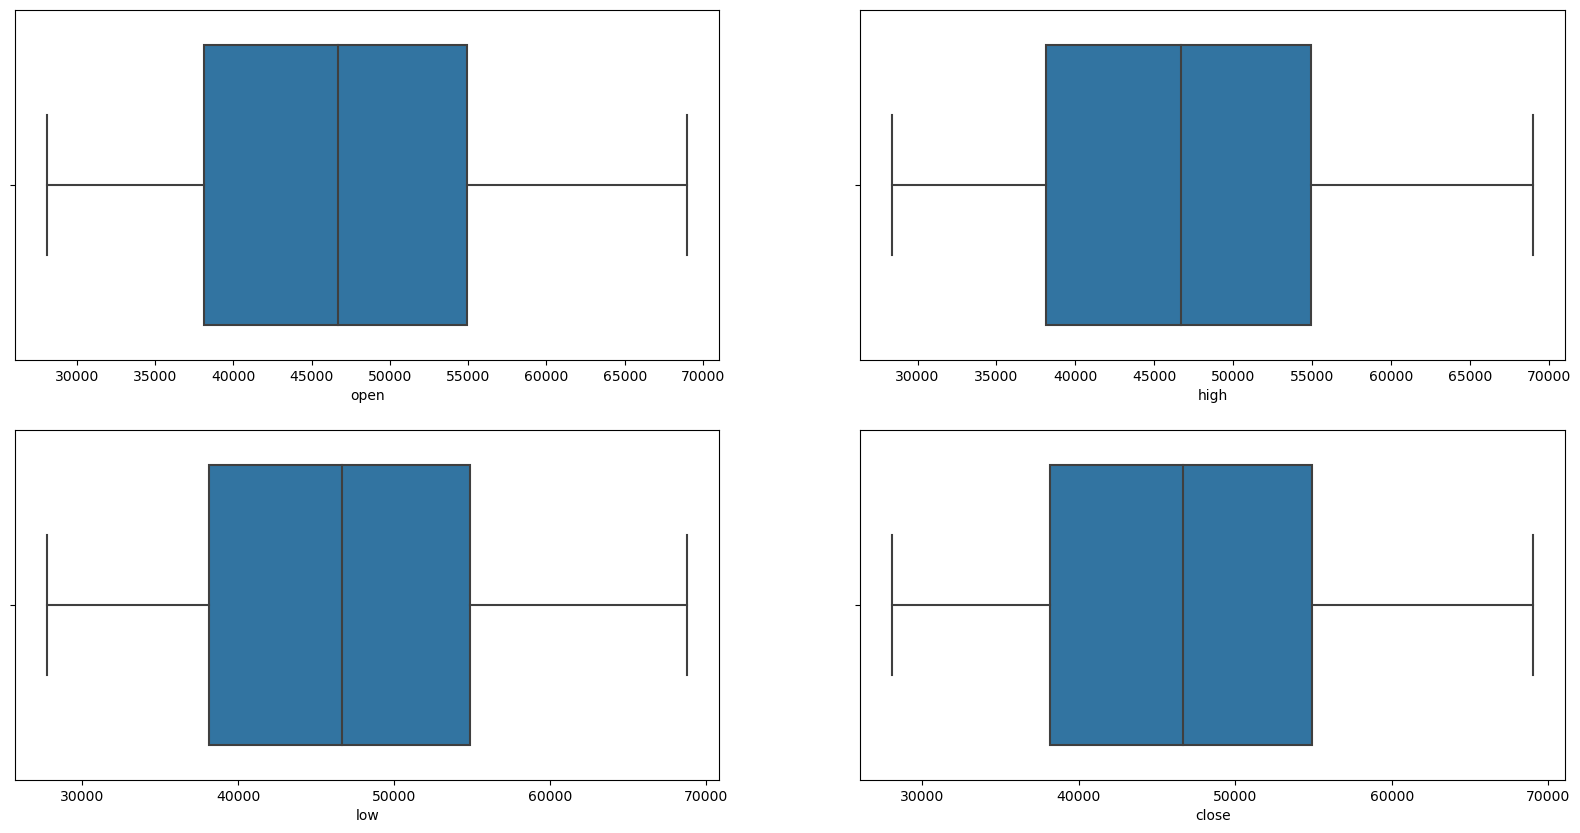

In [13]:
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[col])
plt.show()

### There are not any outliers in the data.

In [14]:
data.head()

,date,time,open,high,low,close,Volume BTC,Volume USD
0,01-03-2022,03:43:00,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,01-03-2022,03:41:00,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,01-03-2022,03:40:00,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,01-03-2022,03:39:00,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390270
4,01-03-2022,03:38:00,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [15]:
splitted = data['date'].str.split('-', expand=True)
data['year'] = splitted[2].astype('int')
data['month'] = splitted[1].astype('int')
data['day'] = splitted[0].astype('int')

In [16]:
data.head()

,date,time,open,high,low,close,Volume BTC,Volume USD,year,month,day
0,01-03-2022,03:43:00,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,2022,3,1
1,01-03-2022,03:41:00,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022,3,1
2,01-03-2022,03:40:00,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022,3,1
3,01-03-2022,03:39:00,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390270,2022,3,1
4,01-03-2022,03:38:00,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022,3,1


## Grouping Dataset By Year 2021 & 2022 

In [17]:
data_grouped = data.groupby('year').mean()

C:\Users\91914\AppData\Local\Temp\ipykernel_7092\1313343493.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = data.groupby('year').mean()


In [18]:
data_grouped

,open,high,low,close,Volume BTC,Volume USD,month,day
year,,,,,,,,
2021,47385.908011,47415.005190,47356.171859,47386.211297,3.430366,151548.104220,6.526038,15.720576
2022,40906.579359,40924.355001,40888.003550,40906.872204,1.529454,61197.805823,1.478570,15.250731


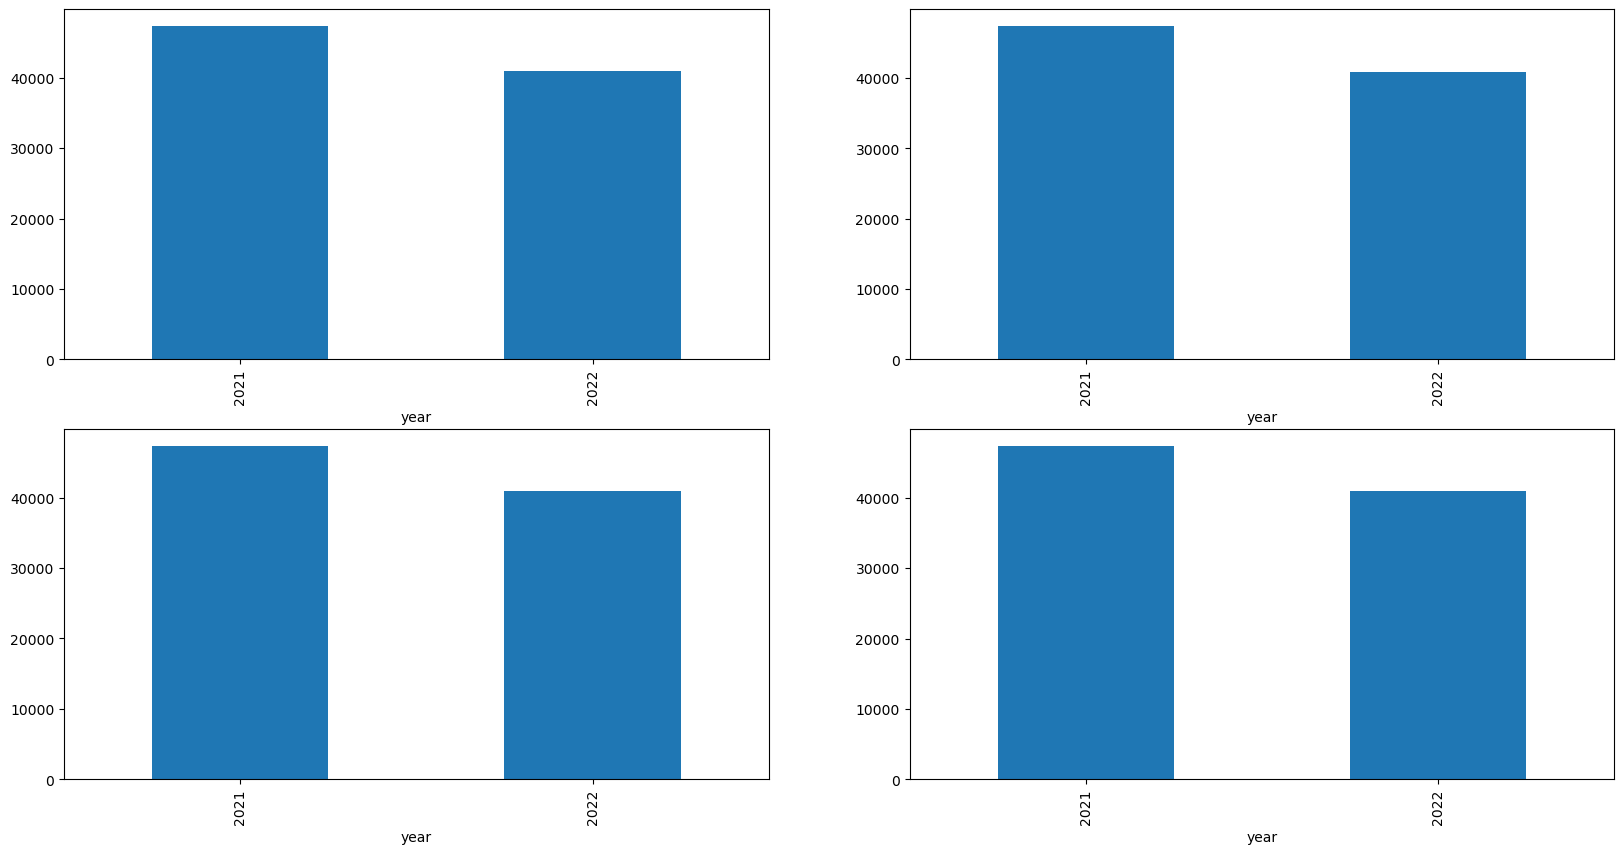

In [19]:
plt.subplots(figsize=(20,10))
for i,col in enumerate(['open','high','low','close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [20]:
data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()

,date,time,open,high,low,close,Volume BTC,Volume USD,year,month,day,is_quarter_end
0,01-03-2022,03:43:00,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,2022,3,1,1
1,01-03-2022,03:41:00,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022,3,1,1
2,01-03-2022,03:40:00,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022,3,1,1
3,01-03-2022,03:39:00,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390270,2022,3,1,1
4,01-03-2022,03:38:00,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022,3,1,1


In [21]:
data['price change'] = data['close'] - data['open']
data['low-high'] = data['low'] - data ['high']
data['target'] = np.where(data['close'].shift(-1)>data['close'],1,0)

In [22]:
data.head()

,date,time,open,high,low,close,Volume BTC,Volume USD,year,month,day,is_quarter_end,price change,low-high,target
0,01-03-2022,03:43:00,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,2022,3,1,1,0.00,0.00,0
1,01-03-2022,03:41:00,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022,3,1,1,28.35,-28.36,0
2,01-03-2022,03:40:00,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022,3,1,1,-6.21,-6.21,0
3,01-03-2022,03:39:00,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390270,2022,3,1,1,-35.72,-35.72,1
4,01-03-2022,03:38:00,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022,3,1,1,-28.36,-28.36,1


### Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.
 

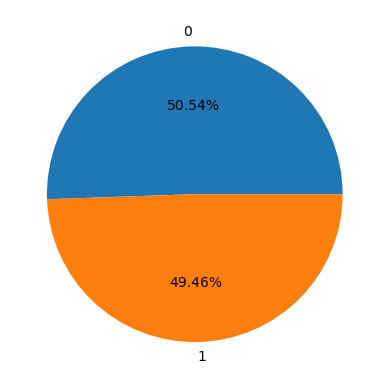

In [23]:
plt.pie(data['target'].value_counts().values,labels=[0,1],autopct='%2.2f%%')
plt.show()

## Correletion Reprentation 

### When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm. 

C:\Users\91914\AppData\Local\Temp\ipykernel_7092\4093156706.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr()>0.9, annot=True, cbar=False)


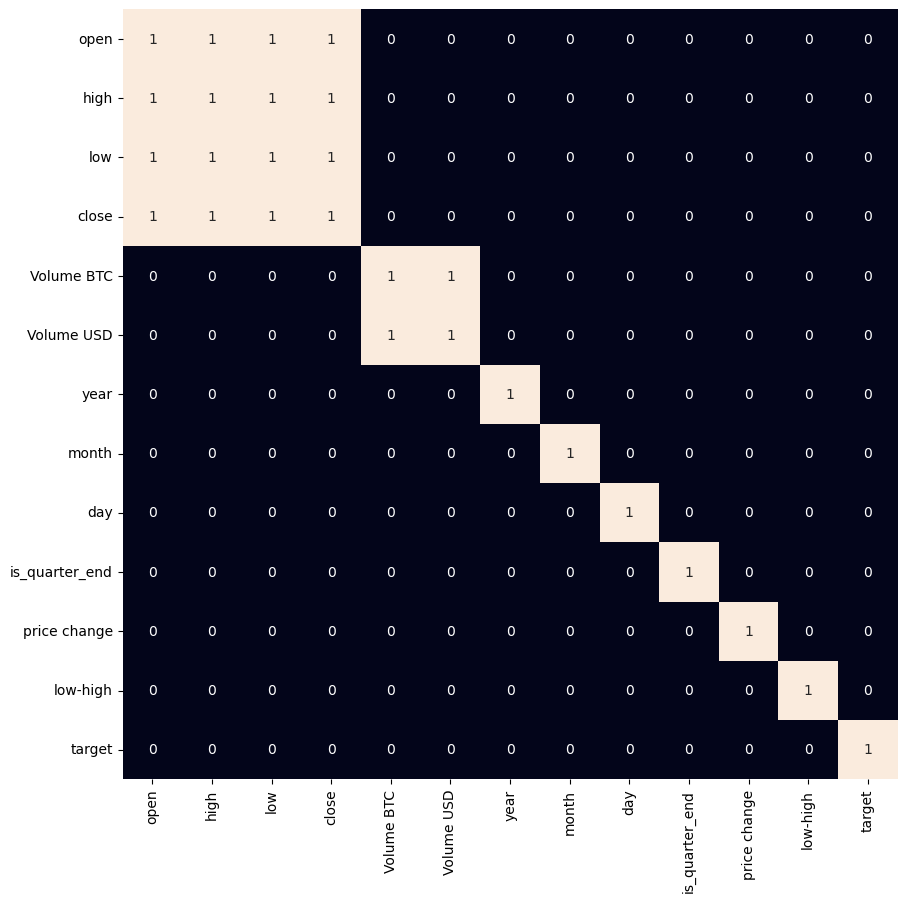

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr()>0.9, annot=True, cbar=False)
plt.show()

### From the above heatmap, we can say that there is a high correlation between OHLC which is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model 

# Import Required Libraries For Train & Pridict Model   

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [26]:
features = data[['price change','low-high','is_quarter_end']]
target = data['target']
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Splitting Dataset 

In [27]:
X_train,X_valid,y_train,y_valid = train_test_split(features, target, test_size=0.2, random_state=40)

In [28]:
print(X_train.shape,X_valid.shape)

(488625, 3) (122157, 3)


In [29]:
print(y_train.shape,y_valid.shape)

(488625,) (122157,)


### After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 80/20 ratio so, that we can evaluate the performance of our model on unseen data.

# Training Dataset 

In [30]:
from xgboost import XGBClassifier 

In [31]:
XG_model = XGBClassifier().fit(X_train,y_train)

In [32]:
XG_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
y_pred1 = XG_model.predict(X_valid)

# Accuracy Score 

In [34]:
XG_model.score(X_valid,y_valid)*100

84.70165442831765

#### Our XG_model Achieve Accuracy 84.7%

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_valid,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     61940
           1       0.86      0.83      0.84     60217

    accuracy                           0.85    122157
   macro avg       0.85      0.85      0.85    122157
weighted avg       0.85      0.85      0.85    122157



# Conclusion: 

 We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 84%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction